## In this Notebook...

- The suitability of growing winter wheat is plotted
    - as plots
    - as gif
- Areas are calculated 
    - as absolute area
    - as harvested area

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
import home

In [2]:
# Run the script

In [3]:
import dicts
dicts.crop_dict["winter_wheat"]["chill_units"]

35

## plot the data

In [6]:
deg_list = ["present day"] + ["+2K"] + ["+3K"]  + ["+4K"]
scen_list = ["f2017"] + ["f2038"] + ["f2065"]+ ["f2093"]
scen_dict = dict(zip(scen_list,deg_list))

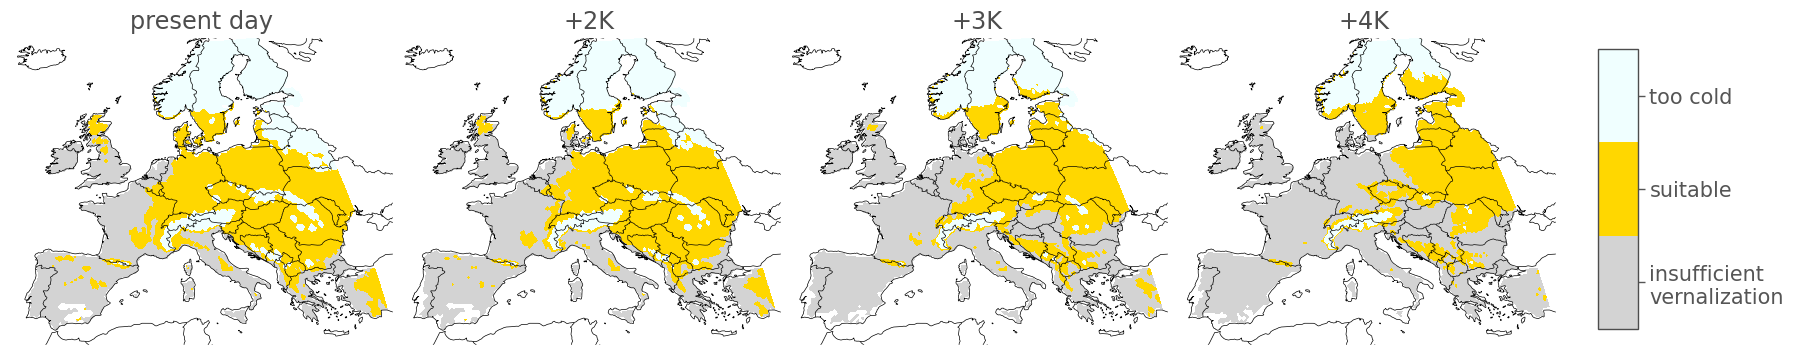

In [5]:
# make colorbar
sns.set_context("paper")
color_list = ["darkgrey","darkgrey","lightgrey","bisque","wheat","gold","orange","sandybrown","aliceblue"]
color_list = ["lightgrey","gold","azure"]
color_obj = mcolors.LinearSegmentedColormap.from_list("mymap",color_list,3)

#set info
res = "025"
forcings = ["f2017","f2038","f2065","f2093"]
plt.style.use("ggplot")
fig, axs = plt.subplots( ncols = 4,figsize=(20,4),subplot_kw={"projection": ccrs.Orthographic(5,15)}) #ccrs.Orthographic(5,15)
plt.subplots_adjust(hspace=0,wspace=0)
#for index, item in enumerate (my_list):
for ax,forcing in zip(axs.flat, forcings):
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025.nc")
    # set boundaries for the colors (+-0.5 around the value)
    colorvalues = [-1,2,5,6]
    # assing an plot 
    data = wheat_map#.sel(lat=slice(34.875,67.875),lon = slice(-10.375,31.375))
    #fig,ax = plt.subplots(figsize=(5, 5),subplot_kw={"projection": ccrs.PlateCarree()})
    plot = ax.contourf(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap = color_obj,levels =colorvalues)
    
    #add features
    ax.coastlines();
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_facecolor("white")
    #ax.gridlines(visible=False,draw_labels={"bottom": "x", "left": "y"})
    #add title
    ax.set_title(scen_dict[forcing],fontsize="xx-large",color="0.3")

#add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(plot,cax=cbar_ax)
cbar.outline.set_edgecolor('0.3')

#cbar.set_label('winter wheat suitability',  rotation=90,fontsize=10)
cbar.set_ticks([.5,3.5,5.5])
cbar.ax.tick_params(labelsize=15)
cbar.set_ticklabels(['insufficient \nvernalization', 'suitable', 'too cold'])
#plt.tight_layout()
#plt.savefig(f"{home.hsplot}/crop_areas/wwh_planting_suitability_line.png",dpi=300,bbox_inches='tight')

In [6]:
#with different setting for vernalization requirement: if 80% of the required chill days are reached, the area is deemed suitable 

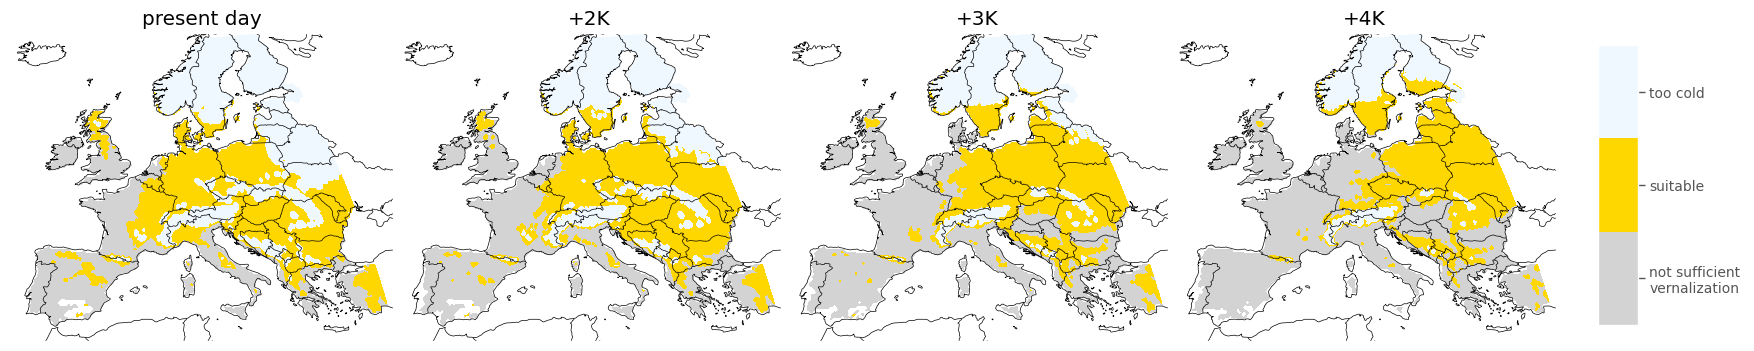

In [9]:
# make colorbar
sns.set_context("paper")
color_list = ["lightgrey","lightgrey","bisque","wheat","gold","orange","sandybrown","aliceblue"]
color_list = ["lightgrey","gold","aliceblue"]
color_obj = mcolors.LinearSegmentedColormap.from_list("mymap",color_list,3)

#set info
res = "025"
forcings = ["f2017","f2038","f2065","f2093"]
plt.style.use("ggplot")
fig, axs = plt.subplots( ncols = 4,figsize=(20,4),subplot_kw={"projection": ccrs.Orthographic(5,15)}) #ccrs.Orthographic(5,15)
plt.subplots_adjust(hspace=0,wspace=0)
#for index, item in enumerate (my_list):
for ax,forcing in zip(axs.flat, forcings):
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025_ci08.nc")
    # set boundaries for the colors (+-0.5 around the value)
    colorvalues = [-1,2,5,6]
    # assing an plot 
    data = wheat_map.sel(lat=slice(34.875,67.875),lon = slice(-10.375,31.375))
    #fig,ax = plt.subplots(figsize=(5, 5),subplot_kw={"projection": ccrs.PlateCarree()})
    plot = ax.contourf(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap = color_obj,levels =colorvalues)
    
    #add features
    ax.coastlines();
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_facecolor("white")
    #ax.gridlines(visible=False,draw_labels={"bottom": "x", "left": "y"})
    #add title
    ax.set_title(scen_dict[forcing])

#add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(plot,cax=cbar_ax)
#cbar.set_label('winter wheat suitability',  rotation=90,fontsize=10)
cbar.set_ticks([.5,3.5,5.5])
cbar.ax.tick_params(labelsize=10)
cbar.set_ticklabels(['not sufficient \nvernalization', 'suitable', 'too cold'])
#plt.tight_layout()
#plt.savefig(f"{home.hsplot}/crop_areas/wwh_planting_suitability_line.png",dpi=300,bbox_inches='tight')

In [ ]:
#with 70% vernalization % new definition of too cold

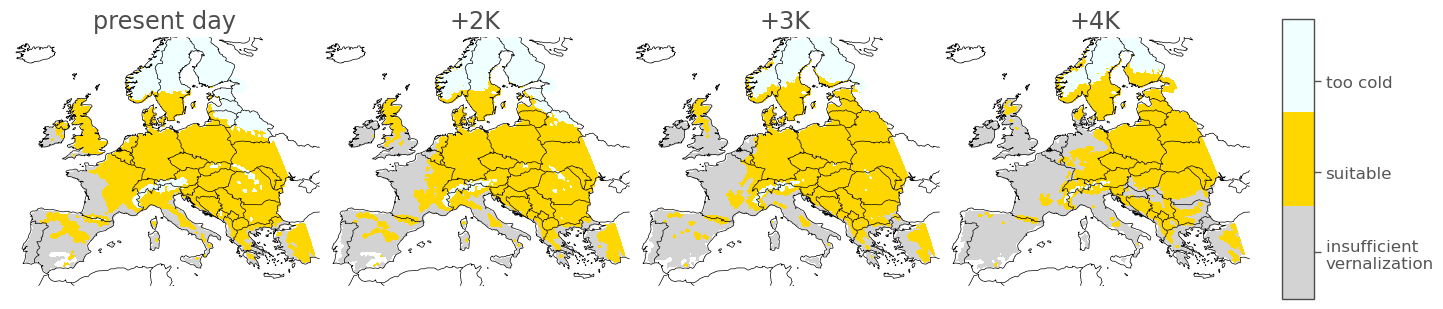

In [8]:
# make colorbar
sns.set_context("paper")
color_list = ["darkgrey","darkgrey","lightgrey","bisque","wheat","gold","orange","sandybrown","aliceblue"]
color_list = ["lightgrey","gold","azure"]
color_obj = mcolors.LinearSegmentedColormap.from_list("mymap",color_list,3)

#set info
res = "025"
forcings = ["f2017","f2038","f2065","f2093"]
plt.style.use("ggplot")
fig, axs = plt.subplots( ncols = 4,figsize=(16,4),subplot_kw={"projection": ccrs.Orthographic(5,15)}) #ccrs.Orthographic(5,15)
plt.subplots_adjust(hspace=0,wspace=0)
#for index, item in enumerate (my_list):
for ax,forcing in zip(axs.flat, forcings):
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
    # set boundaries for the colors (+-0.5 around the value)
    colorvalues = [0,1,6.5,8]
    # assing an plot 
    data = wheat_map.sel(lat=slice(34.875,67.875),lon = slice(-10.375,31.375))
    #fig,ax = plt.subplots(figsize=(5, 5),subplot_kw={"projection": ccrs.PlateCarree()})
    plot = ax.contourf(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap = color_obj,levels =colorvalues)
    
    #add features
    ax.coastlines();
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_facecolor("white")
    #ax.gridlines(visible=False,draw_labels={"bottom": "x", "left": "y"})
    #add title
    ax.set_title(scen_dict[forcing],fontsize="xx-large",color="0.3")

#add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax)
cbar.outline.set_edgecolor('0.3')
#cbar.set_label('winter wheat suitability',  rotation=90,fontsize=10)
cbar.set_ticks([0.5,3,7])
cbar.ax.tick_params(labelsize=12)
cbar.set_ticklabels(['insufficient \nvernalization', 'suitable', 'too cold'])
#plt.tight_layout()
plt.savefig(f"{home.hsplot}/crop_areas/wwh_planting_suitability_ci07.png",dpi=300,bbox_inches='tight')
plt.savefig(f"{home.hsplot}/paper/wwh_planting_suitability_ci07.eps",dpi=300,bbox_inches='tight')

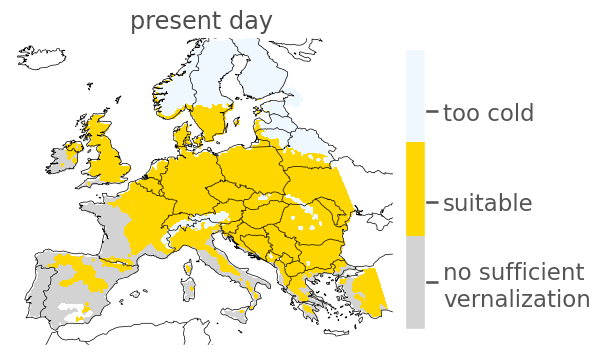

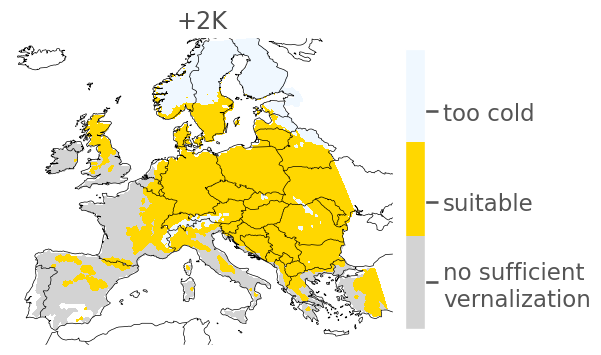

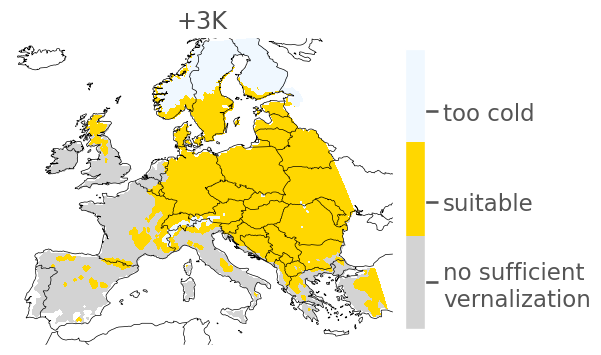

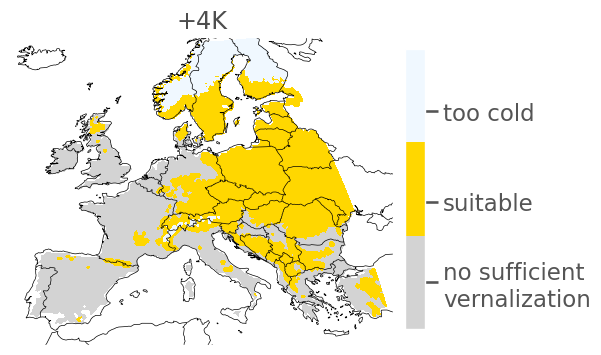

In [164]:
# make colorbar
sns.set_context("talk")
color_list = ["lightgrey","lightgrey","bisque","wheat","gold","orange","sandybrown","aliceblue"]
color_list = ["lightgrey","gold","aliceblue"]
color_obj = mcolors.LinearSegmentedColormap.from_list("mymap",color_list,3)

#set info
res = "025"
forcings = ["f2017","f2038","f2065","f2093"]
plt.style.use("ggplot")

#for index, item in enumerate (my_list):
for f,forcing in enumerate(forcings):
    fig, ax = plt.subplots(figsize=(5,4),subplot_kw={"projection": ccrs.Orthographic(5,15)}) #ccrs.Orthographic(5,15)
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
    # set boundaries for the colors (+-0.5 around the value)
    colorvalues = [0,1,6.5,8]
    # assing an plot 
    data = wheat_map.sel(lat=slice(34.875,67.875),lon = slice(-10.375,31.375))
    #fig,ax = plt.subplots(figsize=(5, 5),subplot_kw={"projection": ccrs.PlateCarree()})
    plot = ax.contourf(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap = color_obj,levels =colorvalues)
    
    #add features
    ax.coastlines();
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_facecolor("white")
    #ax.gridlines(visible=False,draw_labels={"bottom": "x", "left": "y"})
    #add title
    ax.set_title(scen_dict[forcing],fontsize="xx-large",color="0.3")

    #add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.04, 0.7])
    cbar = fig.colorbar(plot,cax=cbar_ax)
    #cbar.set_label('winter wheat suitability',  rotation=90,fontsize=10)
    cbar.set_ticks([0.5,3,7])
    #cbar.ax.tick_params(labelsize=15)
    cbar.set_ticklabels(['no sufficient \nvernalization', 'suitable', 'too cold'])
    #plt.tight_layout()
    plt.savefig(f"{home.hsplot}/crop_areas/wwh_planting_suitability_{forcing}-gif.png",dpi=300,bbox_inches='tight')

## Create GIF


In [165]:
import glob
import os
filenames = sorted(glob.glob(f"{home.hsplot}/crop_areas/wwh_planting_suitability_f*gif.png"))
filenames

['/home/b/b381935//scenic_heatstress//Plots/crop_areas/wwh_planting_suitability_f2017-gif.png',
 '/home/b/b381935//scenic_heatstress//Plots/crop_areas/wwh_planting_suitability_f2038-gif.png',
 '/home/b/b381935//scenic_heatstress//Plots/crop_areas/wwh_planting_suitability_f2065-gif.png',
 '/home/b/b381935//scenic_heatstress//Plots/crop_areas/wwh_planting_suitability_f2093-gif.png']

In [166]:
import imageio.v2 as imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(f"{home.hsplot}/crop_areas/wwh_planting_suitability.gif", images,duration=1)

## calculate the area 

In [102]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Function to calculate cell areas
def calculate_cell_areas(latitudes, longitudes, mask):
    areas = np.zeros_like(mask, dtype=float)
    for i in range(1, len(latitudes)):
        for j in range(1, len(longitudes)):
            lat1, lon1 = latitudes[i-1], longitudes[j-1]
            lat2, lon2 = latitudes[i], longitudes[j]
            dlat = haversine(lat1, lon1, lat2, lon1)
            dlon = haversine(lat1, lon1, lat1, lon2)
            areas[i-1, j-1] = dlat * dlon
    da =  xr.DataArray(areas,dims=["lat","lon"], coords={"lat":latitudes,"lon":longitudes}).where(mask>0)
    return da

In [94]:
forcing= "f2038"

df_wheat_area = pd.DataFrame({"forcing":["ggcmi","f2017","f2038","f2065","f2093"]}).set_index("forcing")
#df_wheat_area[["area"]] = np.nan

In [109]:
# Area = Total area of the cells that fall within the right criteria 
for forcing in ["f2017","f2038","f2065","f2093"]:
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
    #print(wheat_map)
    mask = wheat_map.where((wheat_map >= 0) & (wheat_map <=6),np.nan)
    mask = mask.where(mask !=0,0.5)
    wheat_map = wheat_map.to_dataset(name="wwh")

    areas = calculate_cell_areas(wheat_map.lat.values,wheat_map.lon.values,mask)
    wheat_map["area"] = areas
    #print(areas)
    ww_area = wheat_map.where((wheat_map.wwh >= 1) & (wheat_map.wwh <=6)).area.sum()
    sw_area = wheat_map.where((wheat_map.wwh == 0)).area.sum()
    #p = wheat_map.where((wheat_map.wwh >= 2) & (wheat_map.wwh <6)).area.plot(subplot_kws=dict(projection=ccrs.Orthographic(5,15)), transform=ccrs.PlateCarree())
    #p.axes.coastlines()
    #p.axes.add_feature(cartopy.feature.BORDERS)
    #plt.show()
    df_wheat_area.loc[forcing,"area_ww"] = ww_area
    df_wheat_area.loc[forcing,"area_sw"] = sw_area
df_wheat_area


area_ww       area_sw
forcing                            
ggcmi    5.699375e+06  5.699375e+06
f2017    3.209531e+06  1.068139e+06
f2038    3.095982e+06  1.363183e+06
f2065    2.999947e+06  1.652220e+06
f2093    2.786387e+06  1.987837e+06

In [110]:
# Percentage of area loss from 2093 to 2017 
(df_wheat_area.loc["f2017","area_ww"] - df_wheat_area.loc["f2093","area_ww"]) /df_wheat_area.loc["f2017","area_ww"]*100

13.183997320984254

In [111]:
#Calculate with the GGCMI mask area
ggcmi_area = xr.load_dataset(f"{home.hspath}/crop_areas/winter_and_spring_wheat_areas_EU_025.nc")
ggcmi_cell_area = calculate_cell_areas(ggcmi_area.lat.values,ggcmi_area.lon.values,ggcmi_area.wwh_mask)
#ggcmi_cell_area.plot()
df_wheat_area.loc["ggcmi","area_ww"] = ggcmi_cell_area.sum()
df_wheat_area.loc["ggcmi","area_sw"] = calculate_cell_areas(ggcmi_area.lat.values,ggcmi_area.lon.values,ggcmi_area.swh_mask).sum()
df_wheat_area

area_ww       area_sw
forcing                            
ggcmi    4.894864e+06  8.045111e+05
f2017    3.209531e+06  1.068139e+06
f2038    3.095982e+06  1.363183e+06
f2065    2.999947e+06  1.652220e+06
f2093    2.786387e+06  1.987837e+06

In [99]:
#Percentage of ara loss comparing ggcmi assumption vs my assumptions
(df_wheat_area.loc["ggcmi","area_ww"]- df_wheat_area.loc["f2017","area_ww"]) / df_wheat_area.loc["ggcmi","area_ww"]*100

43.6862603886709

### combining with the harvested area

## Analyze Area Extend with harvested Area

In [113]:
if "df_wheat_area" in locals():
    df_wheat_area["harvest_area"] = np.nan
else:
    df_wheat_area = pd.DataFrame({"forcing":["f2017","f2038","f2065","f2093"]}).set_index("forcing")
    df_wheat_area[["area","harvest_area"]] = np.nan

In [114]:
harvest_area = xr.open_dataset(home.hspath+"/crop_areas/harvest_areas_EU_025.nc")
for forcing in ["f2017","f2038","f2065","f2093"]:
    wheat_map = xr.open_dataarray(f"{home.hspath}/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
    mask = wheat_map.where((wheat_map < 1) | (wheat_map > 6),1)
    mask = mask.where((wheat_map >= 1) & (wheat_map <=6),np.nan)
    sw_mask = wheat_map.where(wheat_map == 0)
    wheat_harvest_area = harvest_area.where(mask > 0).rf_wheat.mean(dim="year").sum(dim=["lat","lon"]).values/100 #from ha to km²
    sw_harvest_area = harvest_area.where(sw_mask == 0).rf_wheat.mean(dim="year").sum(dim=["lat","lon"]).values/100 #from ha to km²
    df_wheat_area.loc[forcing,"harvest_area"] = wheat_harvest_area 
    df_wheat_area.loc[forcing,"sw_area"] = sw_harvest_area 
df_wheat_area

area_ww       area_sw   harvest_area        sw_area
forcing                                                          
ggcmi    4.894864e+06  8.045111e+05            NaN            NaN
f2017    3.209531e+06  1.068139e+06  242967.869379   47191.247638
f2038    3.095982e+06  1.363183e+06  219750.669869   81085.565829
f2065    2.999947e+06  1.652220e+06  203288.194194  102814.620925
f2093    2.786387e+06  1.987837e+06  178838.128033  127324.058864

In [119]:
#Calculate with the GGCMI mask area
ggcmi_area = xr.load_dataset(f"{home.hspath}/crop_areas/winter_and_spring_wheat_areas_EU_025.nc")
mask = ggcmi_area.wwh_mask
#ggcmi_cell_area.plot()
wheat_harvest_area = harvest_area.where(mask > 0).rf_wheat.mean(dim="year").sum(dim=["lat","lon"]).values/100 #from ha to km²
sw_harvest_area = harvest_area.where(mask == 0).rf_wheat.mean(dim="year").sum(dim=["lat","lon"]).values/100 #from ha to km²
#print(wheat_harvest_area)
df_wheat_area.loc["ggcmi","harvest_area"] = wheat_harvest_area 
df_wheat_area.loc["ggcmi","sw_area"] = sw_harvest_area

In [127]:
np.round(df_wheat_area,2)

area_ww     area_sw  harvest_area    sw_area
forcing                                                 
ggcmi    4894863.93   804511.15     320164.68   26700.51
f2017    3209531.24  1068138.91     242967.87   47191.25
f2038    3095982.14  1363182.61     219750.67   81085.57
f2065    2999947.14  1652220.31     203288.19  102814.62
f2093    2786386.73  1987837.32     178838.13  127324.06

In [126]:
# share of winter wheat
df_wheat_area["harvest_area"].div(df_wheat_area["harvest_area"] + df_wheat_area["sw_area"])*100

forcing
ggcmi    92.302338
f2017    83.736080
f2038    73.046609
f2065    66.411736
f2093    58.412873
dtype: float64

In [125]:
# share of spring wheat
df_wheat_area["sw_area"]/ (df_wheat_area["harvest_area"] + df_wheat_area["sw_area"])*100

forcing
ggcmi     7.697662
f2017    16.263920
f2038    26.953391
f2065    33.588264
f2093    41.587127
dtype: float64

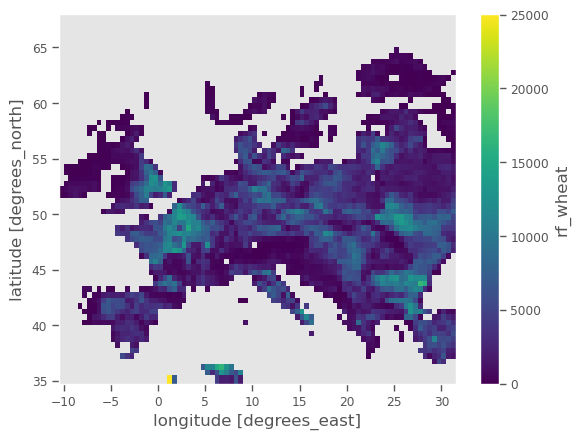

In [116]:
harvest_area.where(mask > 0).rf_wheat.mean(dim="year").plot()

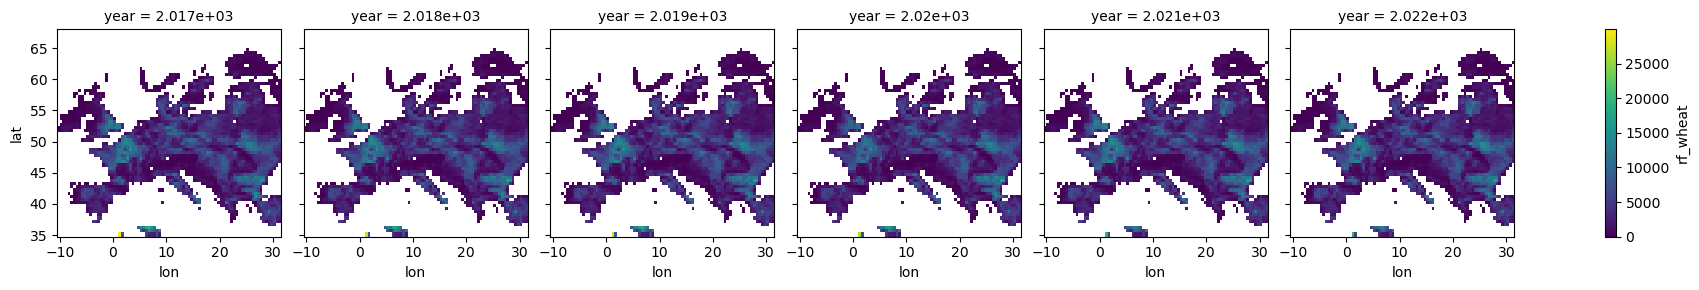

In [66]:
harvest_area.where(mask > 0).rf_wheat.plot(col="year")

In [67]:
#How much area of the gridcell is harvested?
df_wheat_area.harvest_area/df_wheat_area.area*100

forcing
ggcmi    6.540829
f2017    6.129539
f2038    5.986297
f2065    6.191311
f2093    6.588517
dtype: float64

In [129]:
df_wheat_area

area_ww       area_sw   harvest_area        sw_area
forcing                                                          
ggcmi    4.894864e+06  8.045111e+05  320164.678779   26700.510363
f2017    3.209531e+06  1.068139e+06  242967.869379   47191.247638
f2038    3.095982e+06  1.363183e+06  219750.669869   81085.565829
f2065    2.999947e+06  1.652220e+06  203288.194194  102814.620925
f2093    2.786387e+06  1.987837e+06  178838.128033  127324.058864

In [130]:
#compare with ggcmi 
print("        area reduction GGCMI vs. f2017:", round((df_wheat_area.loc["ggcmi","area_ww"]- df_wheat_area.loc["f2017","area_ww"]) / df_wheat_area.loc["ggcmi","area_ww"]*100,1),"%")
print("Harvest area reduction GGCMI vs. f2017:", round((df_wheat_area.loc["ggcmi","harvest_area"]- df_wheat_area.loc["f2017","harvest_area"]) / df_wheat_area.loc["ggcmi","harvest_area"]*100,1),"%")
print("Harvest area reduction GGCMI vs. f2093:", round((df_wheat_area.loc["ggcmi","harvest_area"]- df_wheat_area.loc["f2093","harvest_area"]) / df_wheat_area.loc["ggcmi","harvest_area"]*100,1),"%")

        area reduction GGCMI vs. f2017: 34.4 %
Harvest area reduction GGCMI vs. f2017: 24.1 %
Harvest area reduction GGCMI vs. f2093: 44.1 %


In [131]:
# compare future with present day
print("Harvest area reduction f2017 vs. f2038:", round((df_wheat_area.loc["f2017","harvest_area"]- df_wheat_area.loc["f2038","harvest_area"]) / df_wheat_area.loc["f2017","harvest_area"]*100,1),"%")
print("Harvest area reduction f2017 vs. f2065:", round((df_wheat_area.loc["f2017","harvest_area"]- df_wheat_area.loc["f2065","harvest_area"]) / df_wheat_area.loc["f2017","harvest_area"]*100,1),"%")
print("Harvest area reduction f2017 vs. f2093:", round((df_wheat_area.loc["f2017","harvest_area"]- df_wheat_area.loc["f2093","harvest_area"]) / df_wheat_area.loc["f2017","harvest_area"]*100,1),"%")


Harvest area reduction f2017 vs. f2038: 9.6 %
Harvest area reduction f2017 vs. f2065: 16.3 %
Harvest area reduction f2017 vs. f2093: 26.4 %


In [132]:
# compare with all harvested area 
print("Harvest area reduction f2017 vs. ggcmi harvest area :", round(((wheat_harvest_area-df_wheat_area.loc["f2017","harvest_area"]) / (wheat_harvest_area))*100,1),"%")
print("Harvest area reduction f2038 vs. ggcmi harvest area :", round(((wheat_harvest_area-df_wheat_area.loc["f2038","harvest_area"]) / (wheat_harvest_area))*100,1),"%")
print("Harvest area reduction f2065 vs. ggcmi harvest area :", round(((wheat_harvest_area-df_wheat_area.loc["f2065","harvest_area"]) / (wheat_harvest_area))*100,1),"%")
print("Harvest area reduction f2093 vs. ggcmi harvest area :", round(((wheat_harvest_area-df_wheat_area.loc["f2093","harvest_area"]) / (wheat_harvest_area))*100,1),"%")


Harvest area reduction f2017 vs. ggcmi harvest area : 24.1 %
Harvest area reduction f2038 vs. ggcmi harvest area : 31.4 %
Harvest area reduction f2065 vs. ggcmi harvest area : 36.5 %
Harvest area reduction f2093 vs. ggcmi harvest area : 44.1 %


In [72]:
(df_wheat_area.loc["f2017","harvest_area"]) / (wheat_harvest_area)

0.758884053997911

In [73]:
df_wheat_area.loc["f2017","harvest_area"]/( wheat_harvest_area/100)

75.8884053997911

<AxesSubplot:xlabel='forcing', ylabel='area'>

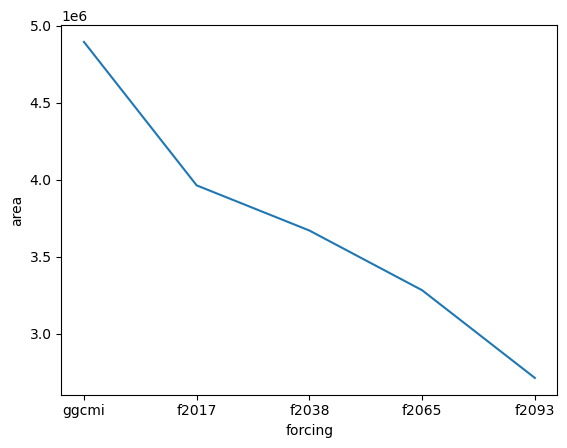

In [74]:
df_wheat_area.reset_index()
sns.lineplot(df_wheat_area.area)

(0.0, 327231.0063167299)

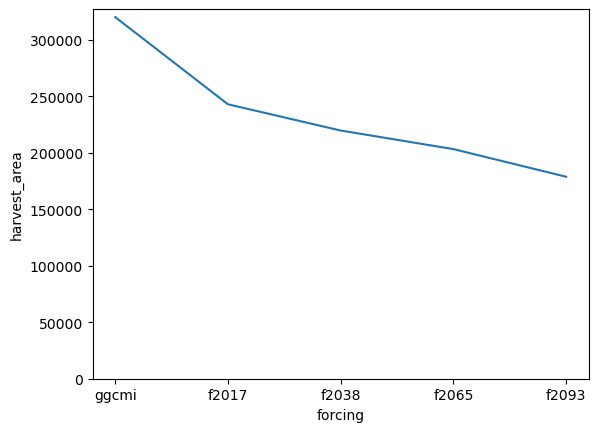

In [75]:
p = sns.lineplot(df_wheat_area.harvest_area)
p.set_ylim(0)

forcing              f2017         f2038         f2065         f2093
area          3.963885e+06  3.670895e+06  3.283443e+06  2.714391e+06
harvest_area  2.429679e+05  2.197507e+05  2.032882e+05  1.788381e+05


<AxesSubplot:xlabel='forcing'>

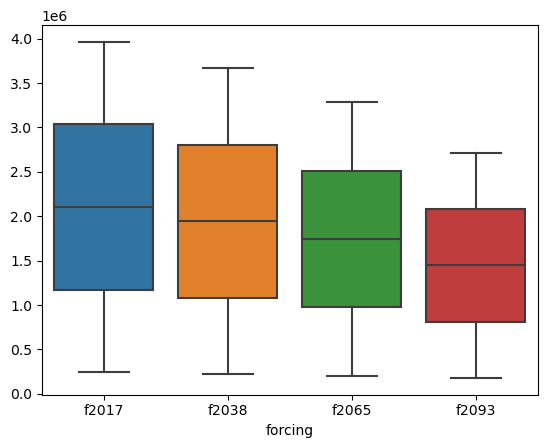

In [76]:
long_wa = df_wheat_area[1:].reset_index().pivot_table(columns="forcing")
print(long_wa)
sns.boxplot(long_wa)

## GGCMI Phase 3 harvest area (from wheat area) vs. MIRCA2000xFAO harvest area

Sum wheat area: 50176144.0 ha


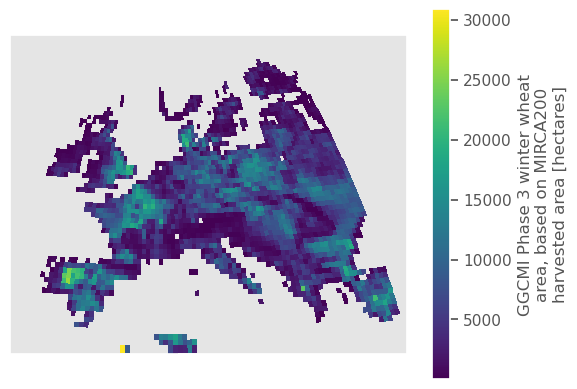

In [190]:
sns.set_context("notebook")
wheat_full = xr.load_dataset(home.hspath + "/crop_areas/winter_and_spring_wheat_areas_EU_025.nc")
wheat_full.wwh_area.where(mask>0).plot(transform=ccrs.PlateCarree(),subplot_kws={"projection": ccrs.Orthographic(5, 15)})
print("Sum wheat area:",wheat_full.wwh_area_rf.where(mask>0).sum().values,"ha")

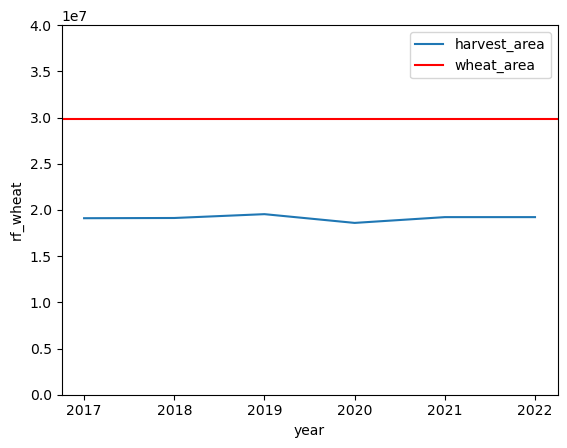

In [144]:
p = sns.lineplot(data=harvest_area.rf_wheat.where(mask>0).sum(dim=["lat","lon"]).to_dataframe(),x="year",y="rf_wheat",label="harvest_area")
p.set_ylim(0,40000000)

plt.axhline(y=wheat_full.wwh_area_rf.where(mask>0).sum().values,color="r",label="wheat_area")

plt.legend()

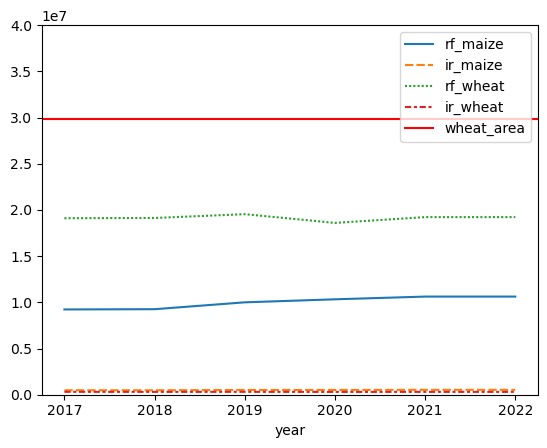

In [150]:
p = sns.lineplot(data=harvest_area.where(mask>0).sum(dim=["lat","lon"]).to_dataframe())
p.set_ylim(0,4e7)

plt.axhline(y=wheat_full.wwh_area_rf.where(mask>0).sum().values,color="r",label="wheat_area")

plt.legend()

In [193]:
harvest_area.where(mask>0).sum(dim=["lat","lon"]).to_dataframe()

rf_maize      ir_maize      rf_wheat       ir_wheat
year                                                           
2017.0  1.084991e+07  1.319113e+06  3.252213e+07  669486.761690
2018.0  1.087234e+07  1.281102e+06  3.204738e+07  651220.397878
2019.0  1.171738e+07  1.363577e+06  3.261653e+07  640596.386643
2020.0  1.218369e+07  1.398739e+06  3.056623e+07  623777.472989
2021.0  1.241392e+07  1.384319e+06  3.217326e+07  637325.422254
2022.0  1.241392e+07  1.384319e+06  3.217326e+07  637325.422254

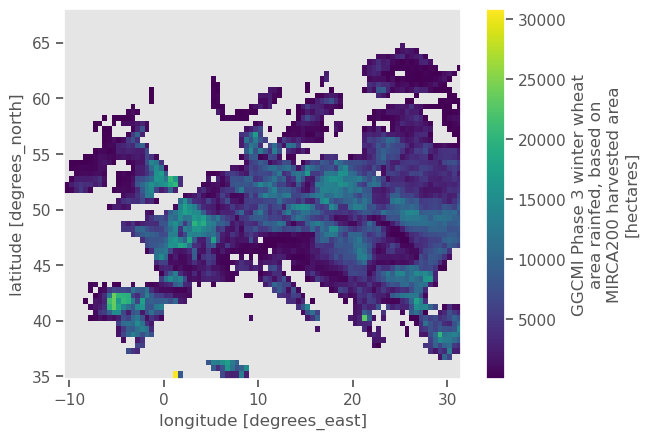

In [199]:
wheat_full.where(mask>0).wwh_area_rf.plot()